<a href="https://colab.research.google.com/github/uegn/Yatogami7618/blob/master/Stock_LSTM_future_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import math
import pandas_datareader.data as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

a=1
import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=a)
tomorrow = tomorrow.strftime("%Y-%m-%d")
print('Tomorrow is:',tomorrow)

data_original = web.DataReader('M', data_source='yahoo', start='1900-01-01' , end='now')

Tomorrow is: 2020-04-30


In [0]:
test_day = 1
amount_of_day = 253

data_high = data_original.filter(['High'])
data_close = data_original.filter(['Close'])
data_open = data_original.filter(['Open'])
data_low = data_original.filter(['Low'])

scaler = MinMaxScaler(feature_range=(0,1))

In [185]:
frames = [data_open, data_high, data_low, data_close]
data_future = pd.concat(frames, axis=1)
data_future

,Open,High,Low,Close
Date,,,,
1992-02-05,9.1250,9.1250,8.2500,8.6250
1992-02-06,8.6250,8.6250,8.3750,8.4375
1992-02-07,8.4375,8.4375,7.8125,7.8125
1992-02-10,7.8750,7.8750,7.5000,7.5625
1992-02-11,7.5625,7.6875,7.5625,7.6875
...,...,...,...,...
2020-04-23,4.7900,5.0900,4.7800,4.8900
2020-04-24,4.9500,5.1200,4.7600,5.0200
2020-04-27,5.1200,5.6400,5.0000,5.5000


## Close

In [138]:
data_set = data_close.values
train_len = math.ceil(len(data_set) - test_day)

scaled_data = scaler.fit_transform(data_set)

train_data = scaled_data[0:train_len,:]

xtrain = []
ytrain = []
for i in range(amount_of_day, len(train_data)):
  xtrain.append(train_data[i-amount_of_day:i,0])
  ytrain.append(train_data[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

modelc = Sequential()
modelc.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
modelc.add(LSTM(50, return_sequences=False))
modelc.add(Dense(25))
modelc.add(Dense(1))

modelc.compile(optimizer='adam', loss='mean_squared_error')
modelc.fit(xtrain, ytrain, batch_size=1, epochs=1)

Epoch 1/1
6857/6857 [==============================] - 1016s 148ms/step - loss: 6.1607e-04


## High

In [139]:
data_set = data_high.values
train_len = math.ceil(len(data_set) - test_day)

scaled_data = scaler.fit_transform(data_set)

train_data = scaled_data[0:train_len,:]

xtrain = []
ytrain = []
for i in range(amount_of_day, len(train_data)):
  xtrain.append(train_data[i-amount_of_day:i,0])
  ytrain.append(train_data[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

modelh = Sequential()
modelh.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
modelh.add(LSTM(50, return_sequences=False))
modelh.add(Dense(25))
modelh.add(Dense(1))

modelh.compile(optimizer='adam', loss='mean_squared_error')
modelh.fit(xtrain, ytrain, batch_size=1, epochs=1)

Epoch 1/1
6857/6857 [==============================] - 1014s 148ms/step - loss: 5.4873e-04


## Open

In [140]:
data_set = data_open.values
train_len = math.ceil(len(data_set) - test_day)

scaled_data = scaler.fit_transform(data_set)

train_data = scaled_data[0:train_len,:]

xtrain = []
ytrain = []
for i in range(amount_of_day, len(train_data)):
  xtrain.append(train_data[i-amount_of_day:i,0])
  ytrain.append(train_data[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

modelo = Sequential()
modelo.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss='mean_squared_error')
modelo.fit(xtrain, ytrain, batch_size=1, epochs=1)

Epoch 1/1
6857/6857 [==============================] - 1001s 146ms/step - loss: 6.3116e-04


## Low

In [141]:
data_set = data_low.values
train_len = math.ceil(len(data_set) - test_day)

scaled_data = scaler.fit_transform(data_set)

train_data = scaled_data[0:train_len,:]

xtrain = []
ytrain = []
for i in range(amount_of_day, len(train_data)):
  xtrain.append(train_data[i-amount_of_day:i,0])
  ytrain.append(train_data[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

modell = Sequential()
modell.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
modell.add(LSTM(50, return_sequences=False))
modell.add(Dense(25))
modell.add(Dense(1))

modell.compile(optimizer='adam', loss='mean_squared_error')
modell.fit(xtrain, ytrain, batch_size=1, epochs=1)

Epoch 1/1
6857/6857 [==============================] - 1040s 152ms/step - loss: 5.6676e-04


## Prediction

In [0]:
day_in_future = 100
scaler = MinMaxScaler(feature_range=(0,1))


scaled_data = scaler.fit_transform(data_close.values)
for i in range(day_in_future):
  train_len = math.ceil(len(data_close.values) - test_day)
  scaled_data = scaler.fit_transform(data_close.values)
  the_next_day = datetime.date.today() + datetime.timedelta(days=i+a)
  if pd.Timestamp.weekday(the_next_day) in [0,1,2,3,4]:
    new_row = pd.DataFrame(index=[pd.to_datetime(the_next_day.strftime("%Y-%m-%d"), format="%Y-%m-%d")])
    data_close = pd.concat([data_close, pd.DataFrame(new_row)], ignore_index=False)

    test_data = scaled_data[train_len-amount_of_day: , :]

    xtest = []
    for j in range(amount_of_day, len(test_data)):
     xtest.append(test_data[j-amount_of_day:j, 0])
    array_xtest = np.array(xtest)
    array_xtest = np.reshape(array_xtest, (array_xtest.shape[0], array_xtest.shape[1], 1))
    prediction = scaler.inverse_transform(modelc.predict(array_xtest))

    data_close['Close'][-1] = prediction[-1]

  else:
    pass


for i in range(day_in_future):
  train_len = math.ceil(len(data_high.values) - test_day)
  scaled_data = scaler.fit_transform(data_high.values)
  the_next_day = datetime.date.today() + datetime.timedelta(days=i+a)
  if pd.Timestamp.weekday(the_next_day) in [0,1,2,3,4]:
    new_row = pd.DataFrame(index=[pd.to_datetime(the_next_day.strftime("%Y-%m-%d"), format="%Y-%m-%d")])
    data_high = pd.concat([data_high, pd.DataFrame(new_row)], ignore_index=False)

    test_data = scaled_data[train_len-amount_of_day: , :]
    
    xtest = []
    for j in range(amount_of_day, len(test_data)):
     xtest.append(test_data[j-amount_of_day:j, 0])
    array_xtest = np.array(xtest)
    array_xtest = np.reshape(array_xtest, (array_xtest.shape[0], array_xtest.shape[1], 1))
    prediction = scaler.inverse_transform(modelc.predict(array_xtest))

    data_high['High'][-1] = prediction[-1]
  else:
    pass


for i in range(day_in_future):
  train_len = math.ceil(len(data_open.values) - test_day)
  scaled_data = scaler.fit_transform(data_open.values)
  the_next_day = datetime.date.today() + datetime.timedelta(days=i+a)
  if pd.Timestamp.weekday(the_next_day) in [0,1,2,3,4]:
    new_row = pd.DataFrame(index=[pd.to_datetime(the_next_day.strftime("%Y-%m-%d"), format="%Y-%m-%d")])
    data_open = pd.concat([data_open, pd.DataFrame(new_row)], ignore_index=False)
    
    test_data = scaled_data[train_len-amount_of_day: , :]

    xtest = []
    for j in range(amount_of_day, len(test_data)):
     xtest.append(test_data[j-amount_of_day:j, 0])
    array_xtest = np.array(xtest)
    array_xtest = np.reshape(array_xtest, (array_xtest.shape[0], array_xtest.shape[1], 1))
    prediction = scaler.inverse_transform(modelo.predict(array_xtest))

    data_open['Open'][-1] = prediction[-1]
  else:
    pass


for i in range(day_in_future):
  train_len = math.ceil(len(data_low.values) - test_day)
  scaled_data = scaler.fit_transform(data_low.values)
  the_next_day = datetime.date.today() + datetime.timedelta(days=i+a)
  if pd.Timestamp.weekday(the_next_day) in [0,1,2,3,4]:
    new_row = pd.DataFrame(index=[pd.to_datetime(the_next_day.strftime("%Y-%m-%d"), format="%Y-%m-%d")])
    data_low = pd.concat([data_low, pd.DataFrame(new_row)], ignore_index=False)
    test_data = scaled_data[train_len-amount_of_day: , :]

    xtest = []
    for j in range(amount_of_day, len(test_data)):
     xtest.append(test_data[j-amount_of_day:j, 0])
    array_xtest = np.array(xtest)
    array_xtest = np.reshape(array_xtest, (array_xtest.shape[0], array_xtest.shape[1], 1))
    prediction = scaler.inverse_transform(modell.predict(array_xtest))

    data_low['Low'][-1] = prediction[-1]
  else:
    pass

In [143]:
frames = [data_open, data_high, data_low, data_close]
data_future = pd.concat(frames, axis=1)
data_future[-day_in_future:]

,Open,High,Low,Close
2020-03-20,6.820000,7.200000,6.000000,6.020000
2020-03-23,5.940000,5.940000,4.730000,4.810000
2020-03-24,5.170000,5.900000,5.060000,5.660000
2020-03-25,6.150000,6.840000,5.200000,6.610000
2020-03-26,6.600000,7.120000,5.880000,5.940000
...,...,...,...,...
2020-08-03,0.705083,13.501312,-3.070581,13.083867
2020-08-04,0.631796,13.578872,-3.203605,13.160564
2020-08-05,0.558435,13.655931,-3.336862,13.236767
2020-08-06,0.485000,13.732494,-3.470358,13.312480


## Prediction into future

In [0]:
def prediction_into_future(m,d,n,q):
  scaler = MinMaxScaler(feature_range=(0,1))
  day_in_future = q

  scaled_data = scaler.fit_transform(d.values)
  for i in range(day_in_future):
    train_len = math.ceil(len(d.values) - test_day)
    scaled_data = scaler.fit_transform(d.values)
    the_next_day = datetime.date.today() + datetime.timedelta(days=i+a)
    if pd.Timestamp.weekday(the_next_day) in [0,1,2,3,4]:
      new_row = pd.DataFrame(index=[pd.to_datetime(the_next_day.strftime("%Y-%m-%d"), format="%Y-%m-%d")])
      d = pd.concat([d, pd.DataFrame(new_row)], ignore_index=False)

      test_data = scaled_data[train_len-amount_of_day: , :]

      xtest = []
      for j in range(amount_of_day, len(test_data)):
        xtest.append(test_data[j-amount_of_day:j, 0])
      array_xtest = np.array(xtest)
      array_xtest = np.reshape(array_xtest, (array_xtest.shape[0], array_xtest.shape[1], 1))
      prediction = scaler.inverse_transform(m.predict(array_xtest))

      d[n][-1] = prediction[-1]

    else:
      pass
  return 

In [0]:
day_into_the_future = 14
prediction_into_future(modelc, data_close,'Close', day_into_the_future)
prediction_into_future(modelh, data_high,'High', day_into_the_future)
prediction_into_future(modelo, data_open,'Open', day_into_the_future)
prediction_into_future(modell, data_low,'Low', day_into_the_future)

In [188]:
frames = [data_open, data_high, data_low, data_close]
data_future = pd.concat(frames, axis=1)
data_future[-day_in_future:]

,Open,High,Low,Close
Date,,,,
2019-12-05,14.90,15.26,14.90,15.11
2019-12-06,15.35,15.52,15.11,15.15
2019-12-09,14.87,15.61,14.76,15.48
2019-12-10,15.44,15.77,15.33,15.74
2019-12-11,15.78,15.96,15.65,15.70
...,...,...,...,...
2020-04-23,4.79,5.09,4.78,4.89
2020-04-24,4.95,5.12,4.76,5.02
2020-04-27,5.12,5.64,5.00,5.50


## Visuallization

In [144]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = data_future

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

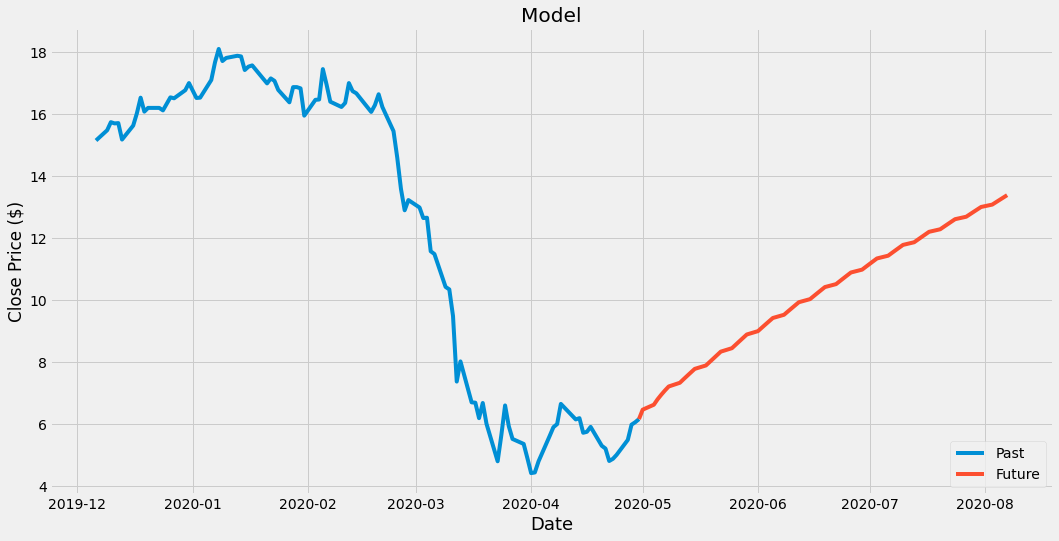

In [165]:
last_th_day = 100
df = data_close
past = df[:tomorrow]
future = df[tomorrow:]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)')
plt.plot(past[-last_th_day:], label="Past")
plt.plot(future, label="Future")
plt.legend(loc='lower right')
plt.show()

